Problem statement:- Find out the factors that effects the price of health insurance premiums cost


In [2]:
#import main librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
df=pd.read_csv(r'D:\Dataset\medical-insurance-\insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape


(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
#checking for null values if present and cleaning the data by removing the null values by replacing it with possible values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

here null values are not present 


#lets do some EDA with some graphs and try to read some parttern in the data though the graphs

<Figure size 640x480 with 0 Axes>

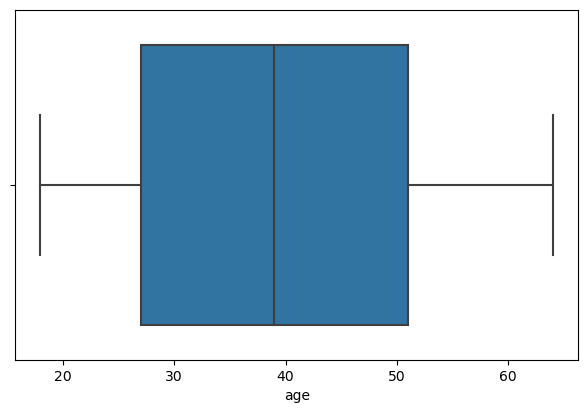

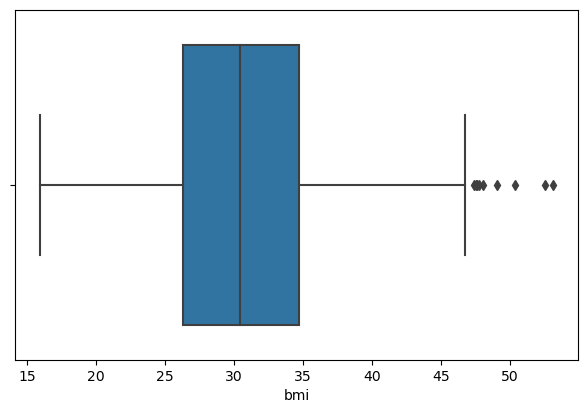

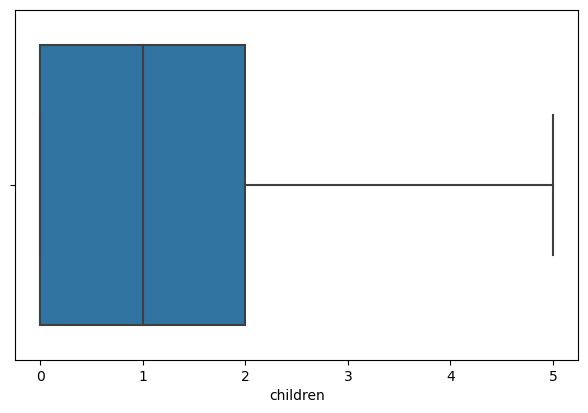

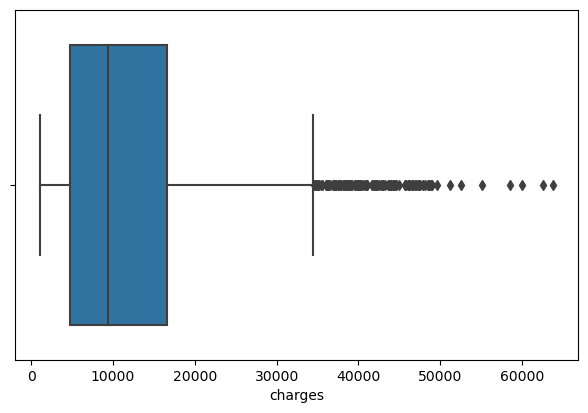

In [9]:
### lets check for outliers by plotting baxplot
bxp= ['age', 'bmi', 'children', 'charges']
plt.suptitle("outliers detection")
for i, col in enumerate(bxp):
    plt.figure(figsize=(16,10))
    ax=plt.subplot(2,2,i+1)
    sns.boxplot(data=df, x=col, ax=ax)
    plt.show()

#from above chats we see that there are some outliers in bmi and charges

C:\Users\rpati\AppData\Local\Temp\ipykernel_7280\2402671235.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


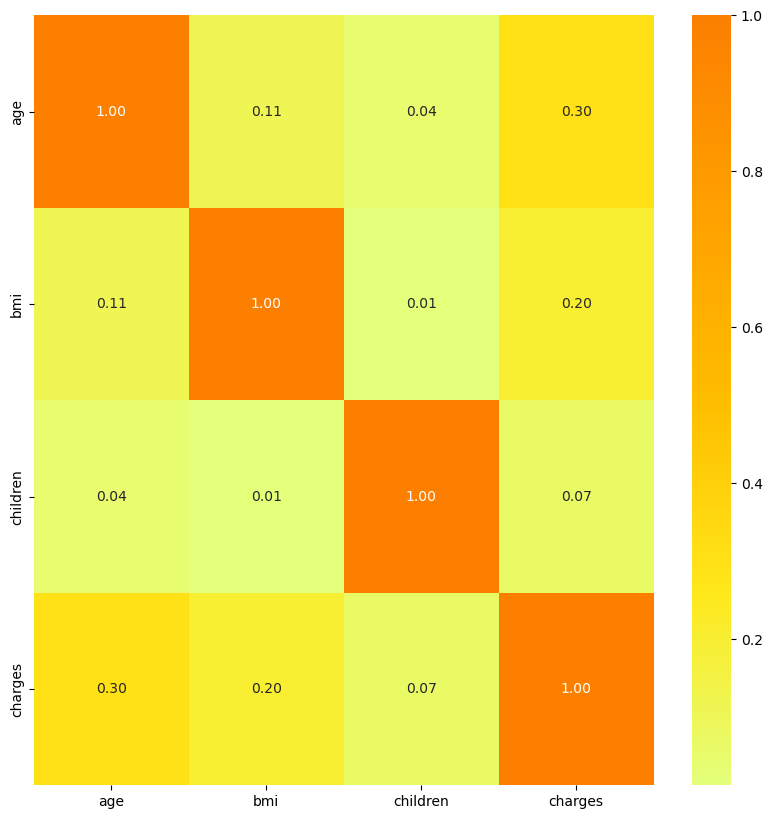

In [17]:
# Let visualise the correlation matrix with the help of heatmap
correlation=df.corr()
f,ax = plt.subplots(1, 1, figsize=(10,10))
ax= sns.heatmap(correlation, annot=True, cmap='Wistia', fmt='.2f')
plt.show()


# lets plot frequency plot for smoker, children and sex

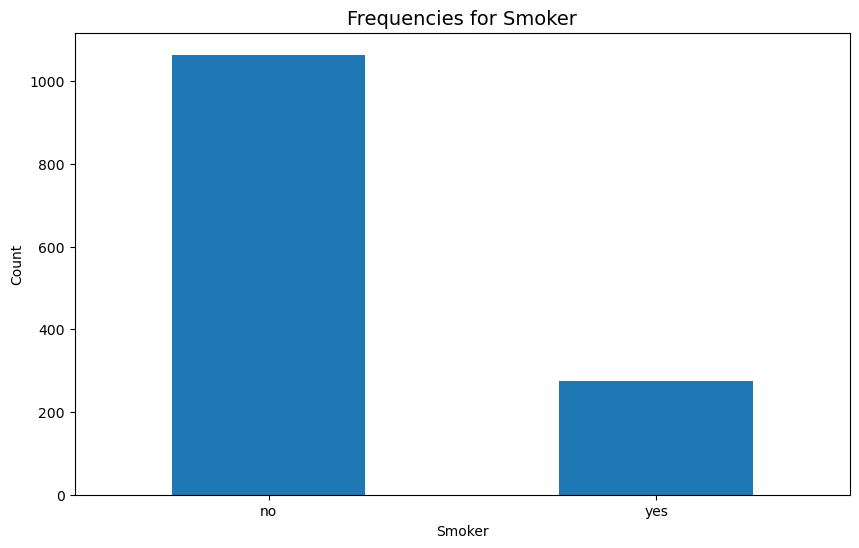

In [25]:
df["smoker"].value_counts().plot(kind='bar', figsize=(10, 6), rot=0)
plt.title("Frequencies for Smoker", fontsize=14)
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

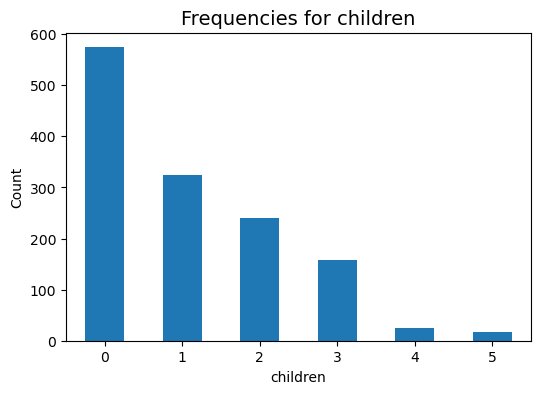

In [27]:
df["children"].value_counts().plot(kind='bar', figsize=(6, 4), rot=0)
plt.title("Frequencies for children", fontsize=14)
plt.xlabel("children")
plt.ylabel("Count")
plt.show()

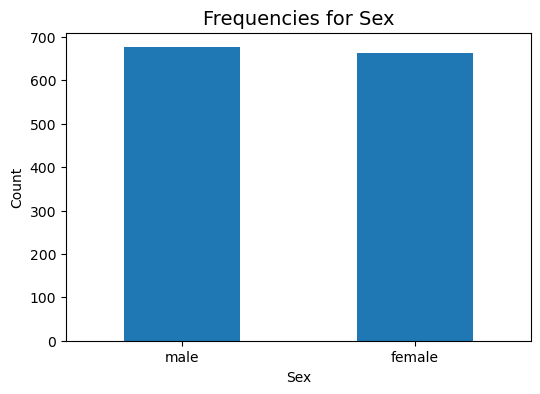

In [29]:
df["sex"].value_counts().plot(kind='bar', figsize=(6, 4), rot=0)
plt.title("Frequencies for Sex", fontsize=14)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

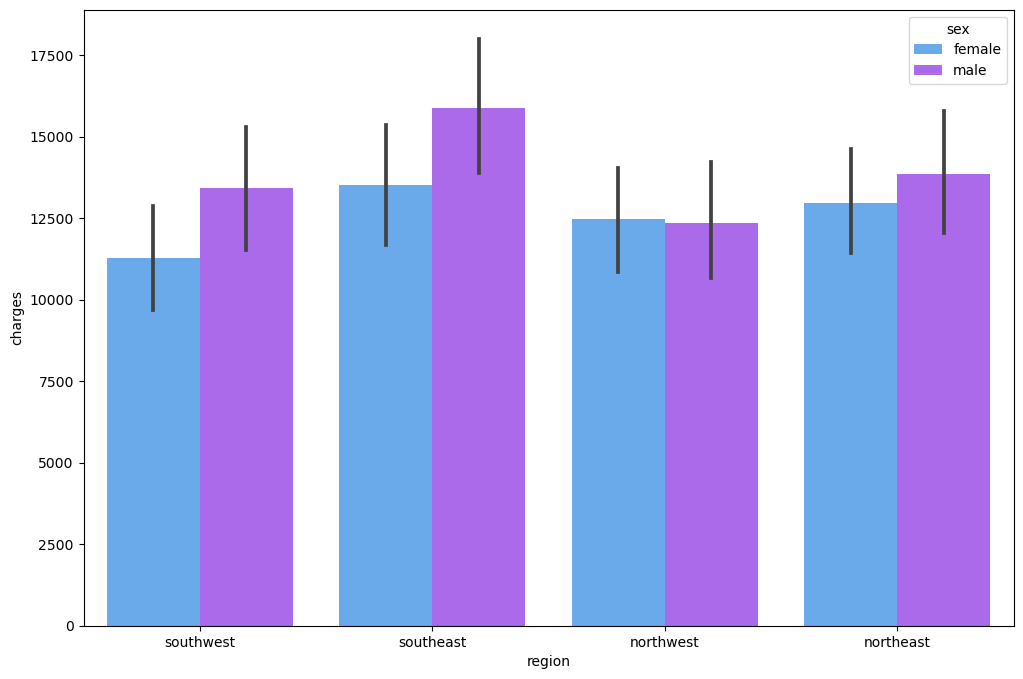

In [38]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

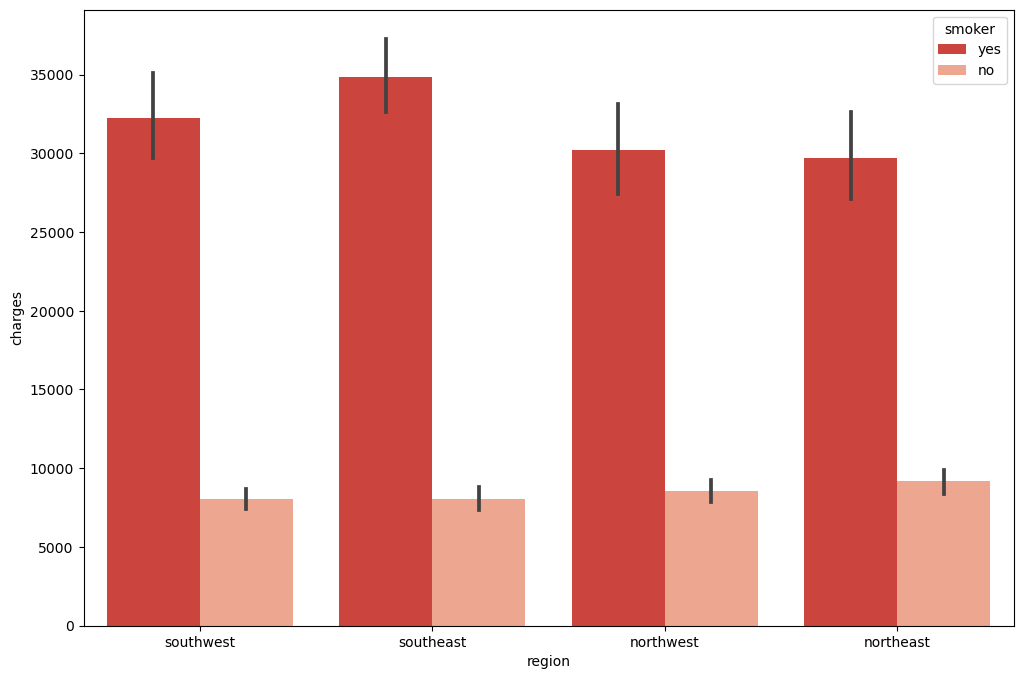

In [39]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

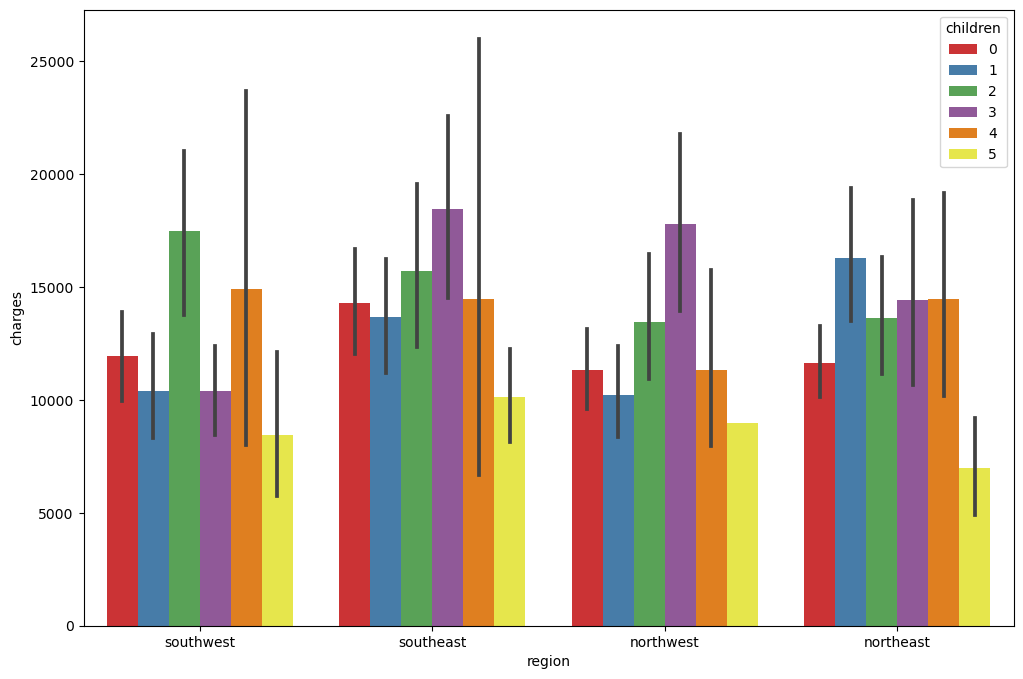

In [40]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

We can see from above plots clearly that being a smoker the charges of medical have frequently increased
As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well


#Now let's analyze the medical charges by age, bmi and children according to the smoking factor 

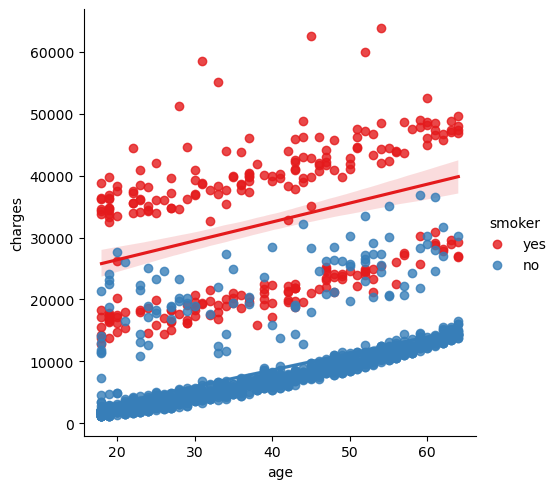

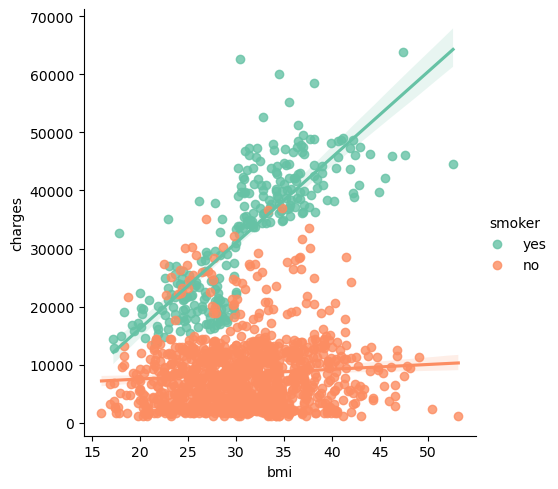

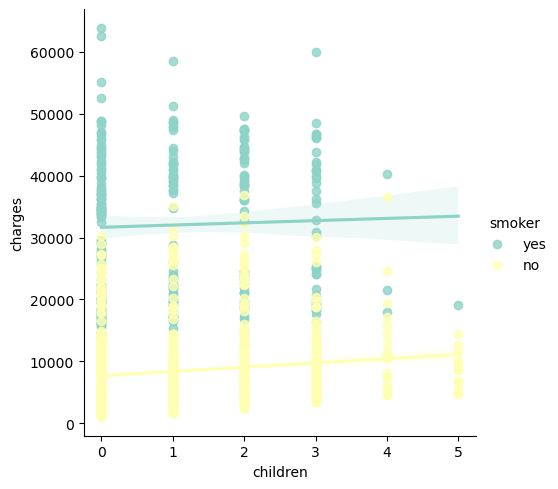

In [41]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less, which the following violinplots shows too

# now lets convert the data into useable format for checking accuracy and doing predictions

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
#lets first convert the objects values into categorical values
df[['sex' , 'smoker' , 'region']] = df[['sex' , 'smoker' , 'region']].astype('category')

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [27]:
#Converting all the category labels into numerical by label encoding method
from sklearn.preprocessing import LabelEncoder
ln= LabelEncoder()
ln.fit(df.sex.drop_duplicates())
df.sex= ln.transform(df.sex)
ln.fit(df.smoker.drop_duplicates())
df.smoker=ln.transform(df.smoker)
ln.fit(df.region.drop_duplicates())
df.region=ln.transform(df.region)

In [28]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int32
charges     float64
dtype: object

#Now that we have converted our data into usable format lets create our model using Linear Regression


In [34]:
from sklearn.model_selection import train_test_split as holdout
from sklearn import metrics

In [39]:
x= df.drop(['charges'] , axis=1)
y=df['charges']
x_train, x_test, y_train, y_test = holdout (x, y, test_size=0.2, random_state= 0)
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.score(x_test, y_test))


-11661.98390882442
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959


#here the score looks good, but lets try to imporve it using polynomialregression and making a better fit model


In [53]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures (degree=2)
x= df.drop(['charges'] , axis=1)
y=df['charges']
x_pol =pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout (x_pol, y, test_size=0.2, random_state= 0)
from sklearn.linear_model import LinearRegression
pol_reg= LinearRegression()
pol_reg.fit(x_train, y_train)
y_train_pred = pol_reg.predict(x_train)
y_test_pred =pol_reg.predict(x_test)
print(lin_reg.intercept_)
print(lin_reg.coef_)
print(lin_reg.score(x_test, y_test))


180276667602005.7
[-1.80276668e+14  1.65973235e+02 -7.75170956e+02  8.76965018e+02
  8.80654151e+02 -9.70407146e+03 -1.75792351e+02  1.69567457e+00
  4.93517103e+01 -2.31387381e+00  7.96690494e+00 -7.03517303e+01
  1.12849486e+01 -7.75170956e+02 -7.34018240e+01  3.81595702e+02
 -3.48718779e+02  6.28563827e+02 -1.08234407e+01  3.54800101e+01
  1.40983094e+03 -6.02667024e+01 -7.08395396e+02  1.22301682e+03
  1.74020933e+02 -9.70407146e+03  1.01053076e+03  1.70578346e+02]
0.8648637939194134


#Great! now we have got a better fit model 

In [58]:
#lets evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 3089.8978738022392
MSE: 21504219.38195875
RMSE: 4637.26421308499


In [61]:
#predicting the charges applicaple as per the factors and compaing the actual values with our predictied values
df= pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
df

,Actual,Predicted
578,9724.53000,13421.68750
610,8547.69130,11232.90625
569,45702.02235,49560.25000
1034,12950.07120,13045.18750
198,9644.25250,9202.50000
...,...,...
1084,15019.76005,17067.75000
726,6664.68595,9634.56250
1132,20709.02034,12398.65625
725,40932.42950,45917.78125


#Conclusion: As we have noticed that smoking is the major factor that effects the medical insurence primuim cost then it's BMI & age.
here as we can see from the score polynomial Regression seems to be the best fit model for our prediction
    